In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

since avialablity, society , area_type, balcony doesn't have a use 

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
del_cols = ['area_type','availability','balcony','society']
df=df.drop(columns=del_cols)

In [7]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df.dropna()         # since no of rows to drop so less in comparison to 13k rows
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))           # x determines the position 0 of row value in a column, convert 0th value into int, The split(' ') function splits a string into a list of substrings based on a specified separator, which in this case is a space character (' '). ex: string = "3 BHK apartment"->['3', 'BHK', 'apartment']
# df2.drop(columns=['size'],inplace=True)
df2.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_10396\3491827982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))           # x determines the position 0 of row value in a column, convert 0th value into int, The split(' ') function splits a string into a list of substrings based on a specified separator, which in this case is a space character (' '). ex: string = "3 BHK apartment"->['3', 'BHK', 'apartment']


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

A house with 43 bedroom can be incorrect info

In [13]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

some values are in range here such as - '1133 - 1384'

In [15]:
#function to check if values are float or not
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2['total_sqft'].apply(isfloat)].head(20)        # returns rows NOT(~) having float values


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


more irregularities observed like: 34.46Sq. Meter, 4125Perch

In [17]:
def range_converter(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[0]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
range_converter('2100-2856')

2100.0

In [19]:
df3 = df2.copy()


In [20]:
df3['total_sqft']=df3['total_sqft'].apply(range_converter)      # returns rows NOT(~) having float values


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [23]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df3.location.unique())


1304

In [25]:
df4 = df3.copy()

In [26]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

taking locations having used < 10 datapoints as others(as general category) to reduce dimensionality curse bu reducing no of rows having less values in data 

In [27]:
len(location_stats<10)

1293

In [28]:
locations_less_than_10 = location_stats[location_stats<10]


In [29]:
df4.location = df4.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df4.location.unique())

255

In [30]:
df4.shape

(13246, 7)

In [31]:
df5  = df4[~(df4.total_sqft/df4.bhk < 300)]
df5.shape

(12500, 7)

Filtering data beyond 1 std deviation

In [32]:
df5['price_per_sqft'].describe()

count     12454.000000
mean       6314.817214
std        4168.946252
min         267.829813
25%        4214.344641
50%        5299.842271
75%        6922.910519
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

# key: This variable represents the unique value of the 'location' column for each group. In other words, key holds the name of the location for the current iteration of the loop.
# subdf: This variable represents a DataFrame subset corresponding to the current group (i.e., the rows where the 'location' column matches the current key). So, subdf contains all rows of the original DataFrame (df) that belong to the current location.

df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

In [35]:
df6.location.value_counts()

other                 2200
Whitefield             479
Sarjapur  Road         296
Electronic City        279
Kanakpura Road         190
                      ... 
Vishwapriya Layout       4
Thyagaraja Nagar         4
HAL 2nd Stage            4
Marsur                   3
BTM 1st Stage            3
Name: location, Length: 255, dtype: int64

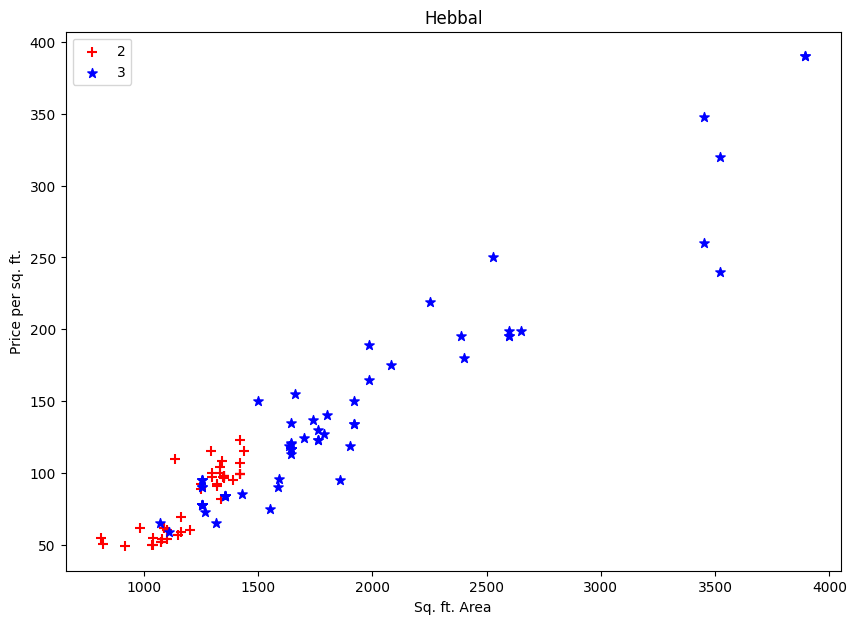

In [36]:
def scatter_Plot(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (10,7)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='+',color='red',label='2',s= 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color='blue',label='3',s= 50)
    plt.xlabel("Sq. ft. Area")
    plt.ylabel('Price per sq. ft.')
    plt.title(location)
    plt.legend()

scatter_Plot(df6,'Hebbal')
    

Observe that for same sq ft area the price of 2bhk homes is greater than price of 3 bhk home

In [37]:
# Removing 2 BHK appartments having price per sqft < 1 BHK
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, locations_df in df.groupby('location'): # for every location going through every location_df which are grouped by locations  
        bhk_stats={}                                       
        for bhk,bhk_df in locations_df.groupby('bhk'):  # for every location_df we are creating dataframe sbased on bhk 
            bhk_stats[bhk]={                    # per bhk_df we are storing mean, std. and count
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in locations_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index') 
         # excluding the price of each data frame whose price is < than the price of previous bhk(-1) dataframe

df7 = remove_bhk_outliers(df6)  
df7.shape
        

(7349, 7)

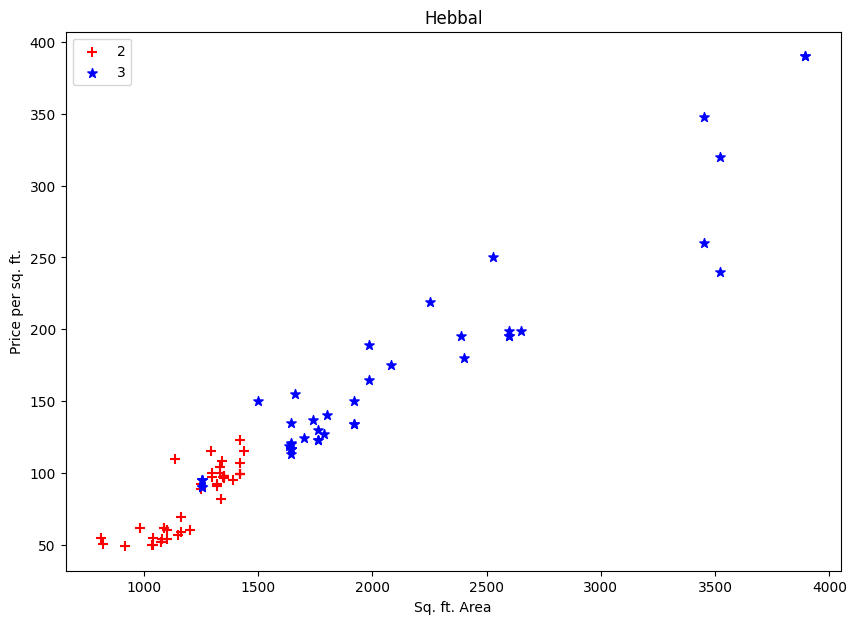

In [38]:
def scatter_Plot(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (10,7)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='+',color='red',label='2',s= 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color='blue',label='3',s= 50)
    plt.xlabel("Sq. ft. Area")
    plt.ylabel('Price per sq. ft.')
    plt.title(location)
    plt.legend()

scatter_Plot(df7,'Hebbal')

Several data  values of 3bhk lying below 2bhk have been removed lying 

Text(0, 0.5, 'Counts')

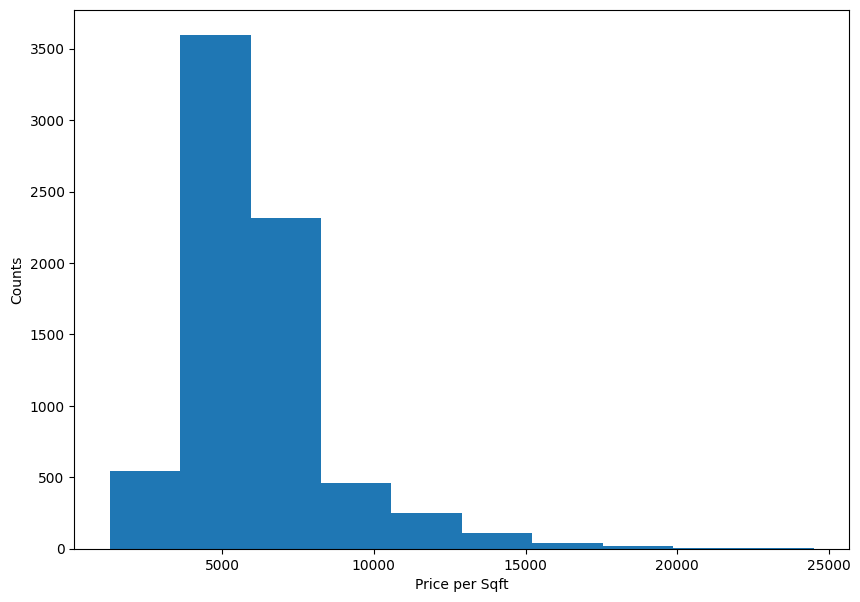

In [39]:
plt.hist(df7.price_per_sqft)
plt.xlabel("Price per Sqft")
plt.ylabel("Counts")

In [40]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5354,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8566,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8652,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9348,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9661,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [41]:
df8 = df7[~(df7.bath> df7.bhk+2)]     # excluding data having bathrooms greater than  +2  of no of bhk

In [42]:
drop=['size','price_per_sqft'] 
df8 = df8.drop(columns=drop)

Converting text column to numerical column using One hot encoding or creating dummies

In [43]:
dummies = pd.get_dummies(df8.location) 
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# df9 = pd.concat([df8,dummies],axis = 'columns')
# df9.drop(columns='other') 

df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis = 'columns')
# to avoid dummy variable trap dropping a column

In [45]:
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df10 = df9.drop(columns='location')       # no need due to dummies

In [47]:
df10.size

1894752

In [48]:
# x contains only the independent variables 
x = df10.drop(columns = 'price')            # price is dependent variabale
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y = df10.price    # y is dependent variable   

For making the train, test set split we used x and y

In [50]:
import sklearn

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

Applying linear regression


In [52]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8670146556175884

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([ 8.05759530e-01,  8.54901448e-01,  8.88582174e-01, -3.88094153e+17,
        8.20154576e-01])

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x,y)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 666,

,model,best_score,best_params
0,linear_regression,0.836287,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.686547,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.612638,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Linear regression gives the best score out of all

In [55]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    p = np.zeros(len(x.columns))
    p[0] = sqft
    p[1] = bath
    p[2] = bhk
    if loc_index >= 0:
        p[loc_index] = 1

    return lr_clf.predict([p])[0]

In [56]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.77522145745085

In [57]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.4881858154984

In [58]:
predict_price('Indira Nagar',1000,3, 2)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.00399740245604

In [59]:
predict_price('Indira Nagar',1000, 3, 3)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


182.72746488266745

In [60]:
# Export the tested model to a pickle file
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [61]:
# Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))